In [1]:
import pickle

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
%matplotlib inline
import pandas as pd

In [3]:
import os, glob
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
from IPython.display import display, HTML, Image

In [5]:
import plotly
import plotly.express as px
import plotly.graph_objects as go

# Determing the firstline

In [6]:
data5H =pd.read_csv('15_PCc_02_LHS_500_54854_01_s1_G.csv')
data5K =pd.read_csv('15_PCc_02_LHS_5000_54854_01_s1_G.csv')
data50K =pd.read_csv('15_PCc_02_LHS_50000_54854_01_s1_G.csv')
#data5k =pd.read_csv(r'F:\ML4ChemcialReactions\chemical5K\10_PC_02_LHS_5000_54854_01_s1_G.csv')


In [7]:
### Remove the space from the column names
data5H.columns =[col.strip() for col in data5H.columns]
data5K.columns =[col.strip() for col in data5K.columns]
data50K.columns =[col.strip() for col in data50K.columns]



In [8]:
data5H.columns

Index(['T', 'CaO', 'SiO2', 'CO2', 'H2O', 'pH', 'MassWater', 'Ca_aq', 'Si_aq',
       'C_aq', 'O_aq', 'H_aq', 'Ca_s', 'Si_s', 'C_s', 'O_s', 'H_s',
       'Portlandite', 'AmorfSi', 'Calcite', 'mCSHQ', 'Ca_ss', 'Si_ss',
       'H2O_ss', 'V_s', 'Gel_water'],
      dtype='object')

In [9]:
data50K.describe().T

count       mean        std           min           25%  \
T            50000.0  25.000000   0.000000  2.500000e+01  2.500000e+01   
CaO          50000.0   0.950000   0.490753  1.000288e-01  5.250170e-01   
SiO2         50000.0   0.450000   0.144339  2.000056e-01  3.249989e-01   
CO2          50000.0   0.480500   0.276842  1.019151e-03  2.407517e-01   
H2O          50000.0   0.100000   0.028868  5.000040e-02  7.500061e-02   
pH           50000.0  10.112609   2.974293  4.430652e+00  9.791969e+00   
MassWater    50000.0   0.087283   0.033707  5.253949e-03  6.107367e-02   
Ca_aq        50000.0   0.001884   0.002293  2.811453e-05  1.606126e-04   
Si_aq        50000.0   0.000116   0.000149  1.625951e-07  2.728634e-06   
C_aq         50000.0   0.066046   0.156108  3.454790e-08  4.805042e-07   
O_aq         50000.0   0.136090   0.316429  1.072319e-04  9.194167e-04   
H_aq         50000.0   0.003761   0.004592  5.096145e-05  3.022260e-04   
Ca_s         50000.0   0.948116   0.491777  8.995429e-02  5.226503e-01   
Si_s         50000.0   0.449884   0.144318  1.994886e-01  3.249264e-01   
C_s          50000.0   0.414454   0.257875  1.018547e-03  1.949700e-01   
O_s          50000.0   3.550305   1.327718  6.935422e-01  2.463960e+00   
H_s          50000.0   1.747025   1.385274  0.000000e+00  1.883268e-01   
Portlandite  50000.0   0.139377   0.255837  0.000000e+00  0.000000e+00   
AmorfSi      50000.0   0.145560   0.212108  0.000000e+00  0.000000e+00   
Calcite      50000.0   0.414454   0.257875  1.018547e-03  1.949700e-01   
mCSHQ        50000.0   0.053621   0.040652  0.000000e+00  7.776657e-03   
Ca_ss        50000.0   0.394285   0.319362  0.000000e+00  4.190265e-02   
Si_ss        50000.0   0.304324   0.220660  0.000000e+00  6.208747e-02   
H2O_ss       50000.0   0.734135   0.570309  0.000000e+00  9.416342e-02   
V_s          50000.0  47.792593  18.317130  9.413027e+00  3.250860e+01   
Gel_water    50000.0   0.297019   0.239655  0.000000e+00  3.217216e-02   

                      50%        75%        max  
T            2.500000e+01  25.000000  25.000000  
CaO          9.499991e-01   1.374992   1.799996  
SiO2         4.499995e-01   0.575000   0.699999  
CO2          4.804951e-01   0.720240   0.959986  
H2O          9.999935e-02   0.124999   0.149999  
pH           1.167446e+01  12.472610  12.472620  
MassWater    8.724050e-02   0.112437   0.185796  
Ca_aq        1.072581e-03   0.002257   0.011701  
Si_aq        1.959599e-05   0.000213   0.000588  
C_aq         7.925488e-07   0.000003   0.864278  
O_aq         2.176463e-03   0.004755   1.742740  
H_aq         2.140314e-03   0.004506   0.023410  
Ca_s         9.494562e-01   1.373716   1.799336  
Si_s         4.498631e-01   0.574864   0.699960  
C_s          3.816516e-01   0.615855   0.959963  
O_s          3.610352e+00   4.619747   6.669579  
H_s          1.803367e+00   2.866163   5.261529  
Portlandite  0.000000e+00   0.183293   1.421199  
AmorfSi      0.000000e+00   0.291708   0.699717  
Calcite      3.816516e-01   0.615855   0.959963  
mCSHQ        5.552074e-02   0.085291   0.142203  
Ca_ss        3.934217e-01   0.634944   1.138770  
Si_ss        3.159481e-01   0.484436   0.699960  
H2O_ss       7.498327e-01   1.170402   2.014381  
V_s          4.799753e+01  63.078273  87.227500  
Gel_water    2.981341e-01   0.475068   0.861489

In [10]:
data5K.columns

Index(['T', 'CaO', 'SiO2', 'CO2', 'H2O', 'pH', 'MassWater', 'Ca_aq', 'Si_aq',
       'C_aq', 'O_aq', 'H_aq', 'Ca_s', 'Si_s', 'C_s', 'O_s', 'H_s',
       'Portlandite', 'AmorfSi', 'Calcite', 'mCSHQ', 'Ca_ss', 'Si_ss',
       'H2O_ss', 'V_s', 'Gel_water'],
      dtype='object')

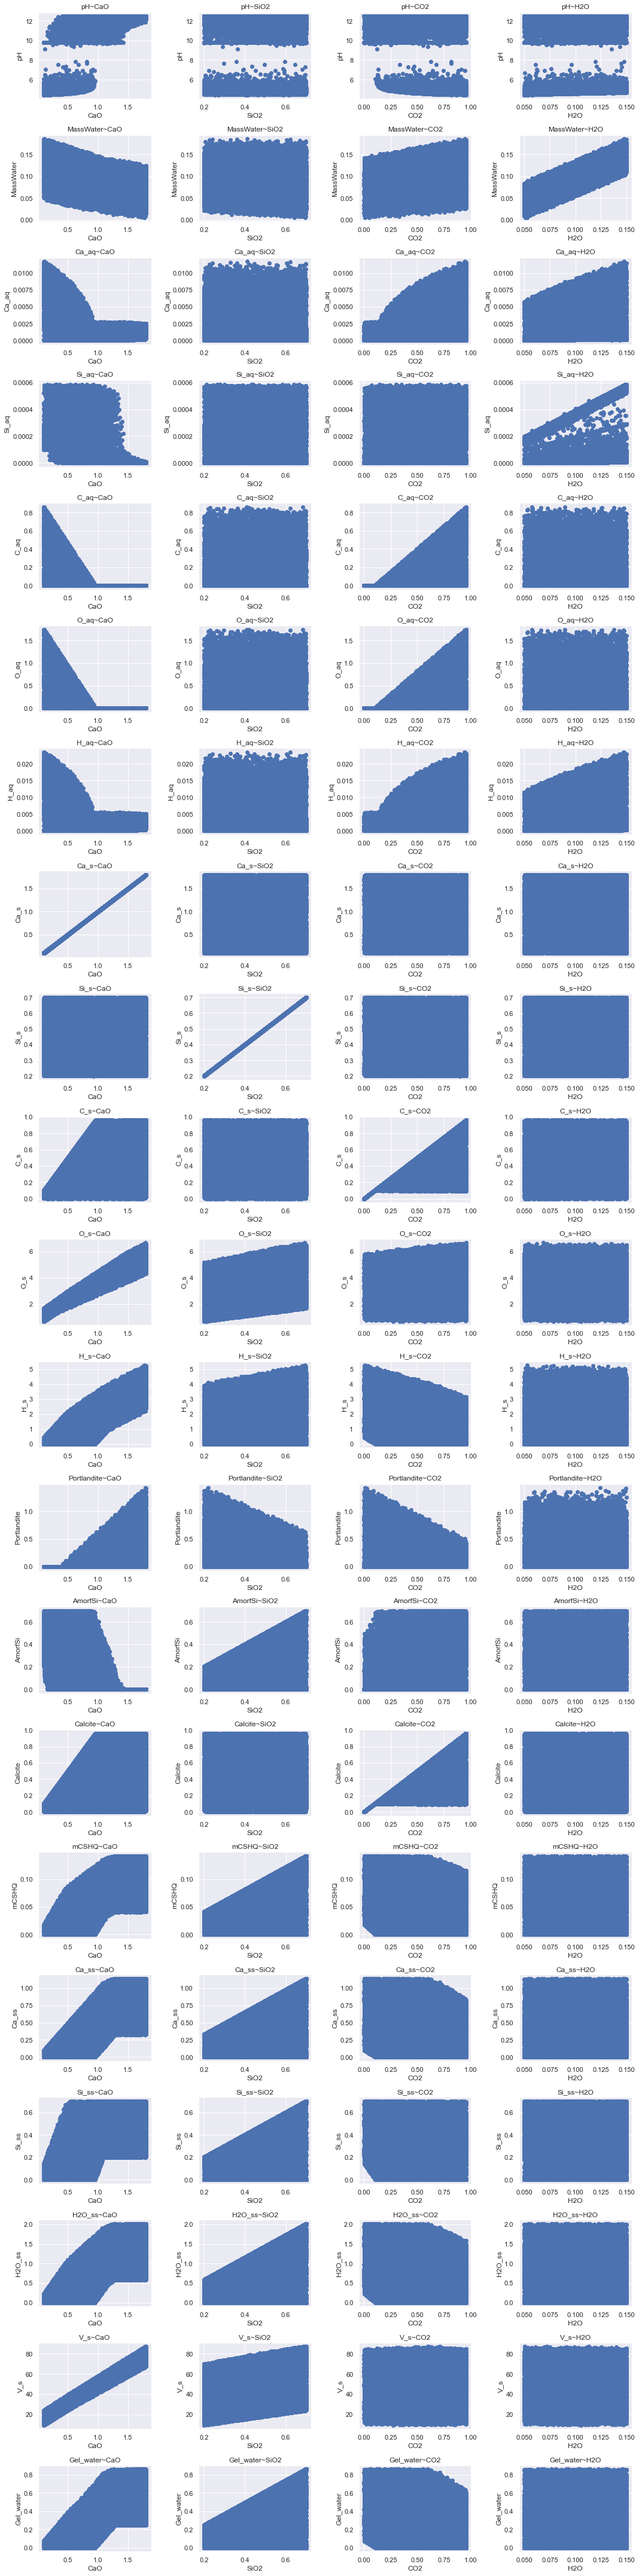

In [11]:
inputCols= ['CaO', 'SiO2', 'CO2','H2O']
outputCols = ['pH', 'MassWater', 'Ca_aq', 'Si_aq',
       'C_aq', 'O_aq', 'H_aq', 'Ca_s', 'Si_s', 'C_s', 'O_s', 'H_s',
       'Portlandite', 'AmorfSi', 'Calcite', 'mCSHQ', 'Ca_ss', 'Si_ss',
       'H2O_ss', 'V_s', 'Gel_water',]
n1 = len(inputCols)
n2 = len(outputCols)
fig,ax=plt.subplots(n2,n1,figsize=(15,60))

for i,coli in enumerate(outputCols):
    for j,colj in enumerate(inputCols):
        ax[i,j].plot(data50K[colj],data50K[coli],'bo')
        ax[i,j].set_title(coli +'~' + colj)
        ax[i,j].set_xlabel(colj)
        ax[i,j].set_ylabel(coli)
plt.tight_layout()

In [12]:
data5K.columns

Index(['T', 'CaO', 'SiO2', 'CO2', 'H2O', 'pH', 'MassWater', 'Ca_aq', 'Si_aq',
       'C_aq', 'O_aq', 'H_aq', 'Ca_s', 'Si_s', 'C_s', 'O_s', 'H_s',
       'Portlandite', 'AmorfSi', 'Calcite', 'mCSHQ', 'Ca_ss', 'Si_ss',
       'H2O_ss', 'V_s', 'Gel_water'],
      dtype='object')

In [13]:
conditions = [
    ((data5K['Portlandite']>0) & (data5K['AmorfSi']==0)),
     ((data5K['Portlandite']==0) & (data5K['AmorfSi']==0)),
     ((data5K['Portlandite']==0) & (data5K['AmorfSi']>0))
    ]
values = ['With Portlandite No AmorfSi ', 'No Portlandite No AmorfSi','No Portlandite with AmorfSi']
data5K['group'] = np.select(conditions, values)
fig =px.scatter_ternary(data5K, a="CaO", b="SiO2", c="CO2",color='group')
fig.show()

In [14]:
conditions = [
    ((data50K['Portlandite']>0) & (data50K['AmorfSi']==0)),
     ((data50K['Portlandite']==0) & (data50K['AmorfSi']==0)),
     ((data50K['Portlandite']==0) & (data50K['AmorfSi']>0))
    ]
values = ['With Portlandite No AmorfSi ', 'No Portlandite No AmorfSi','No Portlandite with AmorfSi']
data50K['group'] = np.select(conditions, values)
fig =px.scatter_ternary(data50K, a="CaO", b="SiO2", c="CO2",color='group')
fig.show()